# Immigration into Spain: A Case Study

**Author:** Georgia Trentalange | **Date:** August 2, 2024

*This is the main notebook for this project. All code, analysis and discussion is contained within this document.*

## Introduction 
This summer, I was an intern at a small non-profit organization based out of Barcelona called the **Open Cultural Center (OCC)**. Its main goal is to support migrants and refugees coming into Spain through free language classes, career workshops, and skill-based classes, as long as need is demonstrated. I took a particular interest in **Migracode**, a daughter project specializing in coding skills classes. Given my background as a female computer science major, I was curious about the general demographics of these classes, and whether this sample reflects those of Barcelona's immigrant population as a whole. I also wondered if any origin countries were increasingly represented among Migracode students. 

These are important questions to ask, as [the educational level of the immigrant population in Spain has remained stagnant since the beginning of the century](https://blog.funcas.es/el-nivel-educativo-de-la-poblacion-inmigrante-en-espana-permanece-estancado-desde-principios-de-siglo/) *despite* positive population growth solely due to immigration. Certain South American countries are eligible for [expedited Spanish nationality applications](https://corralinternational.com/en/complete-guide-for-latin-american-citizens-emigrating-to-spain/#:~:text=Requirements:%20After%20residing%20legally%20in%20Spain%20for,only%20requires%20two%20years%20of%20legal%20residency.), and arrivals continue to break records each year. For these reasons and many others, the OCC needs to be able to recognize whether it effectively attracts immigrants in need so that it can continue to receive donor support. More importantly, it needs to make sure that no eligible immigrant feels deterred from applying on the basis of exclusion or cultural expectations. 

Luckily, it was easy to obtain the data for all of the students who have taken classes through **Migracode** from the years 2021 (its origin year) through 2024. 

Next, I took a look at the **Migracode** user-facing [website](https://migracode.org/) and walked through the application process myself. There are four requirements in order to apply.
 
#### Requirements to be a Migracode Student:

**(1)** EITHER / Be a refugee or asylum seeker / Be a migrant from outside the EU who cannot find work / OR / Be a migrant from outside the EU in a difficult/vulnerable living situation

**(2)** Be fluent in **English** or **Spanish**

**(3)** Have **documentation** to live/work in Spain 

**(4)** Live in/around **Barcelona**

<u>Henceforth, I will be refering to people fulfilling these four criteria as **4 Criteria People**. I will refer to people who are or have been Migracode students as **Migracode Students**.</u>

The form on the Migracode website populates an entry in the data table once a new student has applied. The data table I will start with has been populated with a new row each time a new student applies.

## Research Question: How do Migracode Students differ from 4 Criteria People? 

I want to know if **Migracode Students** represent the general population of **4 Criteria People**, or if there are certain groups that are more highly saturated among **Migracode Students**. 

This may help to determine which groups respond to Migracode recruitment, in order to better target groups which are underrepresented. 


## Some sub-questions: 
### Do Migracode Students already have technical experience? 

This question aims to address the approachability of Migracode classes. The courses are intended to be easy to apply for and encouraging of little to no technical background (unless they are taking the advanced courses). 

If most **Migracode Students** indicate that they already have experience, there may be other factors that discourage unexperienced people to apply, like marketing or website interface. 

### Where do Migracode students come from? 

Are certain countries of origin represented more highly among **Migracode Students** than **4 Criteria People**?  

### What portion of students are over the age of 30? 

It's possible that filling out an online application or embarking on a course in technical skills is more approachable for a younger generation. 

In [48]:
##import cell 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Methods / The Data
I will be using the following datasets/documents, described in more detail below:

**(1)** Migracode's Students Database (modified for anonymity, cleanliness, and application)

**(2)** Ajuntament de Barcelona's (City Hall of Barcelona) public Immigrants by Nationality, Sex, and Age dataset, 2023

**(3)** Instituto Nacional de Estadística (National Statistics Institute): Living Conditions Survey (LCS), 2023, At Risk of Poverty of Social Exclusion (AROPE) by nationality

### Limitations
My main research question is a lofty and largely unattainable ask for the following reasons: 

**There is no way to find data on broader 4 Criteria People.** That is, people who are  (1) immigrants/aslum seekers in sub-optimal financial/employment situations (2) speaking english or spanish,  (3) with documentation (4) in Barcelona. 

**Why?**
- There is *yearly population data* on immigration into Barcelona, but it doesn't get into income, employment or spoken language. Neighborhoods are described, which can hint at financial situation, but ultimately are unreliable indicators. 
- There is *asylum seeker annual arrival data*, but it doesn't describe individual cities or work documentation.
- Annual reports don't describe immigrants who may have arrived a long time ago, and compiling all the yearly data would take lots of time. 


### Solutions

I will describe Migracode students as they appear in the applications data table. Then, I will use various sources for information about arrivals or immigrants in Spain to hopefully describe its immigrant population, though it will be impossible to describe the very specific **4 Criteria Person** demographic. 

### Migracode's Students Database

Migracode's data table was originally populated through the use of a form, intended to register students for individual classes. This means that if a returning student filled out the form for a new class, they were added to the table as a new entry. In order to process each entry as **one individual**, I needed to find a way to combine entries.

I alphabetized the entries by name so that it was more clear which people had taken multiple classes over time, and then manually remove extraneous entries by the same person. I replaced a field originally called **Course** with a field called **Most Basic Course Taken** which describes whether the person *ever* took a basic level course. This will hopefully indicate approachability. 

To preserve anonymity, after each person only had one entry, I removed the names from the sheet and replaced them with an index. This process reduced the entries from 1731 to 1390. 

I also added Did not report or Unknown values, as sometimes there are empty values, which can get in the way of code execution. 

#### Encodings 

**Most Basic Class Taken:**

| Code    | Courses |
| -------- | ------- |
| 0  | Applied for a Beginner class   |
| 1 | Only applied for Intermediate     |
| 2    | Only applied for AWS, ADA     |
| 3    | Only applied for Self-Learning Class

*By this classification, a value of 0 means the student has applied for at least one basic level class, and any other values mean the student has not applied for a basic level class. As this exploration is not concerned with retention, progess of students over time, or popularity of class topics, I simply note the most basic course taken overall.*

**Gender**
| Code    | Gender |
| -------- | ------- |
| 0  | Woman  |
| 1 | Man     |
| 2    | Other   |
| 3 | Did not report | 

**Country of Birth**

A string of the name of the country. If they did not fill it out, it's Unknown


**Languages**
| Code    | Languages |
| -------- | ------- |
| 0  | English  |
| 1 | English Or Spanish     |
| 2    | Spanish   |
| 3 | Unknown | 

**Laptop**
| Code    | Meaning |
| -------- | ------- |
| 0  | I don't have a laptop  |
| 1 | I have a good laptop to use     |
| 2    | I'm not sure/did not select an option  |


**Self-Reported Experience:**

| Code    | Self-Reported Experience |
| -------- | ------- |
| 0  | I don't have previous experience with coding   |
| 1 | I know a little bit about the basics     |
| 2    | I know already about coding   |
| 3 | Did not select an option | 

*To stay true to the form responses, I have copied their original values here, which are awkwardly translated. It should eb noted that language barriers contribute to form confusion as well and can affect applicant responses.*

**Educational Background**
| Code    | Education |
| -------- | ------- |
| 0  | (Online) Courses or Elementary School  |
| 1 | High School     |
| 2    | University   |
| 3 | Other Education | 

**Work Permit**
| Code    | Permit |
| -------- | ------- |
| 0  | I don't have a work permit in Spain  |
| 1 | No, but within 8 months from now I can get it     |
| 2    | I have a work permit in Spain   |
| 3 | I don't know/did not select an option | 

**Age**

-1 if not reported or value is nonsensical (i.e. 110+, 0)
otherwise a two-digit number 

**Nationality**
| Code    | Sex |
| -------- | ------- |
| 1 | Spain  |
| 2 | Rest of the EU     |
| 3 | Rest of the world  |
| 4 | No value     |


**Younger than 30**
| Code | Age group | 
| ------- | -------- |
| -1 | if age is -1 
| 0 | Age is equal to or greater than 30
| 1 | Age is less than 30

#### Preview of Data
*Including modifications to assist data visualization creation*

In [4]:
# LOAD DATASET: Migracode's Students Database
# NAME FOR PANDAS:
#                   migra 
#

migra = pd.read_csv('./data/Students_Migracode_Anon_Encoded.csv')

#Create a new column for nationality 
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 
    'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 
    'Spain', 'Sweden'
]
def classify_country(country):
    if country == 'Spain':
        return 1
    elif country in eu_countries:
        return 2
    elif country == 'Unknown':
        return 4
    else:
        return 3
migra['Nationality'] = migra['Country of Birth'].apply(classify_country)

#Under 30 column 
def age_status(age):
    age = int(age)
    if age == -1:
        return -1
    elif age < 30:
        return 1
    else:
        return 0
        
migra['Younger than 30'] = migra['Age'].apply(age_status)

# Preview the data. 
migra.head(10)


,Application date,Selected course,Gender,Country of Birth,Language(s),Laptop,Previous Experience,Educational background,Work permit,Age,Nationality,Younger than 30
0,18/7/2023,1,1,Egypt,0,1,1,2,2.0,-1,3,-1
1,19/3/2021,1,1,Morocco,0,0,1,1,0.0,38,3,0
2,30/8/2021,1,1,Morocco,0,1,2,2,1.0,28,3,1
3,5/10/2023,2,1,Morocco,0,0,2,2,0.0,25,3,1
4,1/5/2023,0,1,Morocco,1,1,2,0,2.0,33,3,0
5,29/6/2022,0,1,Syria,1,1,2,3,2.0,26,3,1
6,29/3/2022,0,1,Afghanistan,0,0,0,2,1.0,27,3,1
7,4/1/2022,0,1,Syria,0,1,2,1,2.0,24,3,1
8,7/11/2023,2,1,Pakistan,0,1,2,2,0.0,19,3,1
9,28/10/2023,1,1,Afghanistan,0,1,1,2,2.0,37,3,0


### Ajuntament de Barcelona: 

The City Hall of Barcelona provides many public datasets on annual immigration. While they don't report on indications of financial stability or employment, they do report age, nationality, and sex, among other data points. So, while this data will not be a perfect representation of a **4 Criteria Person**, as it lacks information about financial security, employment, spoken langugaes and documentation, it still provides valuable information on the demographics of recent arrivals into Spain. 

### [(1) public Immigrants by Nationality, Sex, and Age dataset, 2023](https://opendata-ajuntament.barcelona.cat/data/en/dataset/pad_imm_mdbas_sexe_edat-q_nacionalitat-g)

This dataset only regards immigration into Barcelona. Large amounts of Spanish nationals are also included in this dataset, which confused me at first. This is actually an indication that though they have Spanish citizenship, they have immigrated to Barcelona from other parts of Spain. 

### [(2) public Population by Nationality dataset, 2023](https://opendata-ajuntament.barcelona.cat/data/en/dataset/pad_mdbas_nacionalitat-pais_nacionalitat-continent_sexe)

This dataset describes Barcelona's population by Nationality. It does not describe the immigration-specific population. 

 
These datasets and their values have been modified from the original. This is because some  information was irrelevant to this exploration, and values and column names were translated from Catalan to English. **These datasets are specific to Barcelona.**

#### Encodings

**Sex**
| Code    | Sex |
| -------- | ------- |
| 1 | Female  |
| 2 | Male     |

*This dataset did not have values for nonbinary or other gender expressions*

**Nationality**
| Code    | Sex |
| -------- | ------- |
| 1 | Spain  |
| 2 | Rest of the EU     |
| 3 | Rest of the world  |
| 4 | No value     |

**Age Range**
| Code    | Sex |
| -------- | ------- |
| 0 | <5 years  |
| 1 | 5-9    |
...
| 20 | >=100  |
| 21| No value     |

**Younger than 30**
| Code | Age group | 
| ------- | -------- |
| -1 | if age is -1 
| 0 | Age is equal to or greater than 30
| 1 | Age is less than 30


                  Nationality  \
0                    No Value   
1  Rest of the European Union   
2           Rest of the World   
3                       Spain   

                                               Count  
0  .................................................  
1  ......56....5..........11611166..................  
2  ............8788575685....................5......  
3  ..........5..........6...........................  


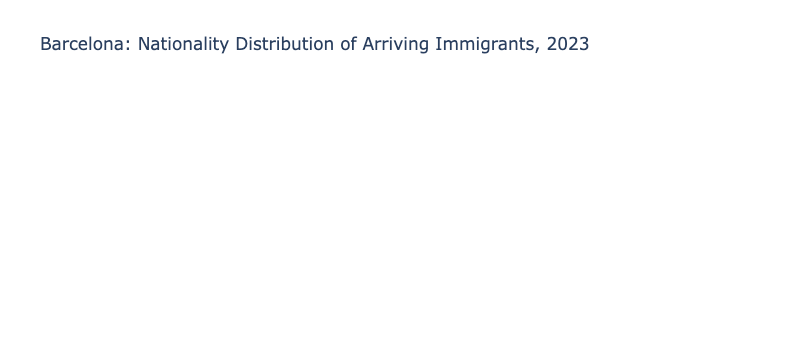

In [78]:
# LOAD DATASET: Ajuntament de Barcelona 
# NAME FOR PANDAS:
#                   bcn 
#
bcn = pd.read_csv('./data/Barcelona_Immigration_City_Hall_2023.csv')
#bcn.head(50)

bcn['Number of People'] = pd.to_numeric(bcn['Valor'].replace('..', pd.NA), errors='coerce')

# Younger than 30 column, modified for age range encodiing used by this dataset 
def age_status(age_code):
    # age_code between 0 and 5 includes ages 0-29
    if 0 <= age_code <= 5:
        return 1
    # age_code between 6 and 20 includes ages 30-100+
    elif 6 <= age_code <= 20:
        return 0
    # age_code outside normal range returns -1, invalid 
    else:
        return -1
        
#switches the sex encoding to match other datasets' values for confusion 
def sex_same(sex_code):
    if 1:
        return 0
    elif 2: 
        return 1
        
bcn['Younger than 30'] = bcn['EDAT_Q'].apply(age_status)
bcn['Sex'] = bcn['SEXE'].apply(lambda x: 0 if x == 1 else 1)
bcn['Age Range'] = bcn['EDAT_Q']
bcn['Nationality'] = bcn['NACIONALITAT_G']
bcn['Nationality Label'] = bcn['Nationality'].map(nationality_names)

nationality_counts = bcn.groupby('Nationality Label')['Valor'].sum().reset_index()
nationality_counts.columns = ['Nationality', 'Count']

print(nationality_counts)

# delete irrelevant columns and those in Catalan
columns_to_delete = ['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Valor', 'AEB', 'Seccio_Censal', 'EDAT_Q', 'SEXE', 'NACIONALITAT_G' ]
bcn.drop(columns=columns_to_delete, inplace=True)
fig = px.pie(nationality_counts, names='Nationality', values='Count',
             title='Barcelona: Nationality Distribution of Arriving Immigrants, 2023',
             labels={'Nationality': 'Nationality', 'Count': 'Count'},
             hole=0.3)  # Use a hole for a donut chart, or set to 0 for a full pie chart

# Show the chart
fig.show()


#print("There are ", len(bcn.axes[0]), " entries in this dataset. ")
#bcn.head(30)



### [Instituto Nacional de Estadística (National Statistics Institute): Living Conditions Survey (LCS), 2023, At Risk of Poverty of Social Exclusion (AROPE) by nationality]((https://ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176807&menu=ultiDatos&idp=1254735976608)

This dataset reports the percentage of the population At Risk of Poverty or Social Exclusion (AROPE). This is a common term used in eurostat data, and it refers to a person who is falls under at least one of [three criteria](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:At_risk_of_poverty_or_social_exclusion_(AROPE)), indicating that they are at risk of poverty or the inability to participate in social, political and cultural. Specifically, it provides this information by nationality, which is what we're interested in as it indicates immigrant status. 

This dataset and its values have been modified from the original. Certain values have been changed to maintain consistency in this exploration, and translations from Spanish to English have been applied. **This data is at the national level**

#### Encodings 

**Nationality**
| Code    | Nationality |
| -------- | ------- |
| 1 | Spain  |
| 2 | Rest of the EU     |
| 3 | Rest of the world  |
| 4 | No value     |
| 5 | Total | 

**Percentage**

A reformatted percentage value from 0 to 100, float. 

**Year** 

The calendar year. Ranges from 2014 to 2023. 

In [54]:
# LOAD DATASET: Instituto Nacional de Estadística, LCS
# NAME FOR PANDAS:
#                   arope 
#

arope = pd.read_csv('./data/Spain_Statistics_AROPE_by_NATIONALITY.csv')
print("Rate of risk of poverty or social exclusion (Europe 2030 objective) (and its components)")

#Make consistent with nationality encoding in this document
def nationality(nationality):
    if nationality == 'Española':
        return 1
    elif nationality == 'Extranjera (Unión Europea)':
        return 2
    elif nationality == 'Extranjera (Resto del mundo)':
        return 3
    elif nationality == 'No consta':
        return 4
    else:
        return 5
arope['Nationality'] = arope['Nacionalidad'].apply(nationality)

def replace_commas_with_dots(percent_str):
    try:
        formatted =  percent_str.replace(',', '.') #converts to U.S. conventions
        return float(formatted) #converts to float for graphical representations
    except ValueError:
        return -1 #some values were not inputted and can't be cast to float

arope['Percentage'] = arope['Total'].apply(replace_commas_with_dots)
arope['Year'] = arope['Periodo']


columns_to_delete = ['Nacionalidad', 'Tasa de riesgo de pobreza o exclusión social (objetivo Europa 2030) (y sus componentes)', 'Total', 'Periodo']
arope.drop(columns=columns_to_delete, inplace=True)

arope.head(10)


Rate of risk of poverty or social exclusion (Europe 2030 objective) (and its components)


,Nationality,Percentage,Year
0,5,25.2,2023
1,5,24.9,2022
2,5,26.9,2021
3,5,26.1,2020
4,5,25.3,2019
5,5,26.8,2018
6,5,26.7,2017
7,5,28.1,2016
8,5,28.0,2015
9,5,29.2,2014


## Results

### Visualizations

In [10]:
# GLOBALS
nationality_names = {
    1: 'Spain',
    2: 'Rest of the European Union',
    3: 'Rest of the World',
    4: 'No Value', 
    5: 'Total'
}


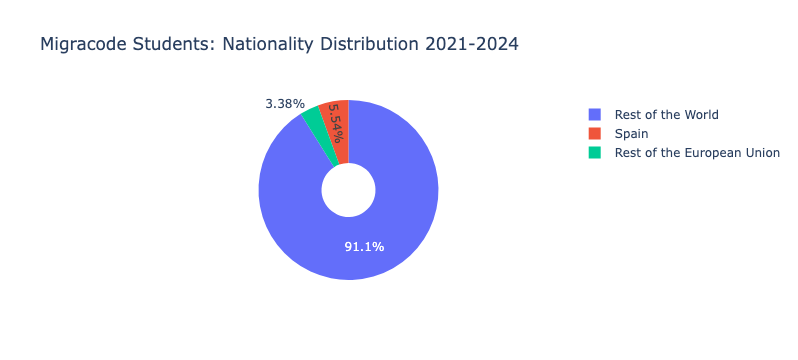

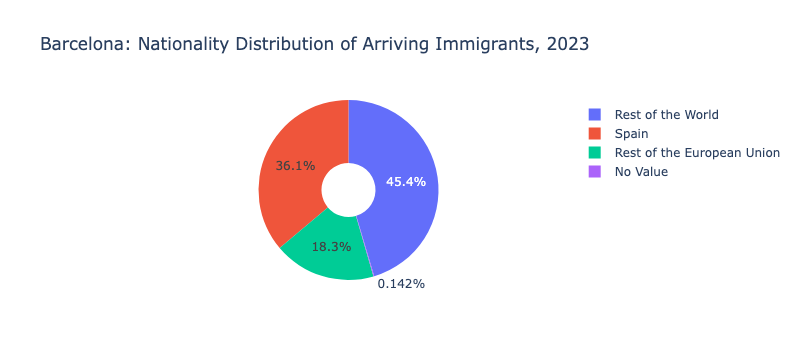

In [76]:
migra['Nationality Label'] = migra['Nationality'].map(nationality_names)

# Count the occurrences of each nationality group
nationality_counts = migra['Nationality Label'].value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Count']

# Create an interactive pie chart
fig = px.pie(nationality_counts, names='Nationality', values='Count',
             title='Migracode Students: Nationality Distribution 2021-2024',
             labels={'Nationality': 'Nationality', 'Count': 'Count'},
             hole=0.3)  # Use a hole for a donut chart, or set to 0 for a full pie chart

# Show the chart
fig.show()

bcn['Nationality Label'] = bcn['Nationality'].map(nationality_names)

# Count the occurrences of each nationality group
nationality_counts = bcn['Nationality Label'].value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Count']

# Create an interactive pie chart
fig = px.pie(nationality_counts, names='Nationality', values='Count',
             title='Barcelona: Nationality Distribution of Arriving Immigrants, 2023',
             labels={'Nationality': 'Nationality', 'Count': 'Count'},
             hole=0.3)  # Use a hole for a donut chart, or set to 0 for a full pie chart

# Show the chart
fig.show()



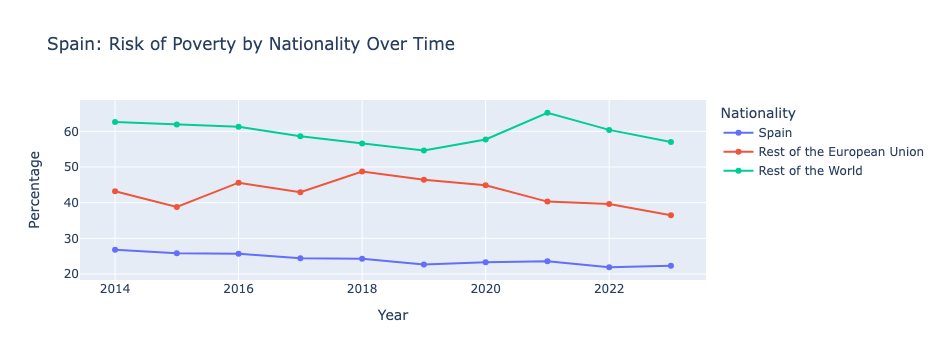

In [12]:

arope['Nationality '] = arope['Nationality'].map(nationality_names)

# Filter out total and no value nationalities
excluded_nationalities = [4, 5]
plot_data = arope[~arope['Nationality'].isin(excluded_nationalities)]


# Create the plot
fig = px.line(plot_data, x='Year', y='Percentage', color='Nationality ', 
              labels={'Percentage': 'Percentage'}, 
              title='Spain: Risk of Poverty by Nationality Over Time')

# Update hover data
fig.update_traces(mode='lines+markers', hovertemplate='Year: %{x}<br>Percentage: %{y}%')

fig.show()




### Analysis 
Because this data comes from Spain nationally, Spanish nationality does not indicate immigration in this graph. As is apparent, nationality as a predictor for AROPE status is very strong. In 2023, the percentage of Spaniards with AROPE status was 22.3%, in contrast to the percentage of immigrants from countries outside of the EU with AROPE status, which was 57, about 2.55 times higher. Immigrants from within the EU are also much more likely to be eligible for AROPE status, though significantly less, with 36.5 percent in 2023. 

Additionally, while Spaniard's risk remains mostly stagnant with a gradual downward trend, the other nationality group's trends are more volatile, though still negative. There are many possible reasons for this, among them changing global situations that might increase the number of immigrants into Spain from places with higher AROPE percentages. This graph does not reflect the total number of people from specific countries nor does it reflect the immigrant population growth in Spain, so making other conclusions is difficult without further exploration. 

For our purposes, this graph reflects that there is great need for services that might further the education and financial status of immigrants from outside the EU. However, it also emphasizes that a large proportion of immigrants from within the EU would also benefit from OCC services. Perhaps the requirement that applicants come from outside the EU does not properly provide for the broader immigrant population in need.  

Due to the volatility of financial situaton for immigrants overall, emphasising retention, community, and other services from the OCC might be helpful to assure that OCC community members are receiving reliable, transformative support even *after* their course is completed. 

## Migracode Students 

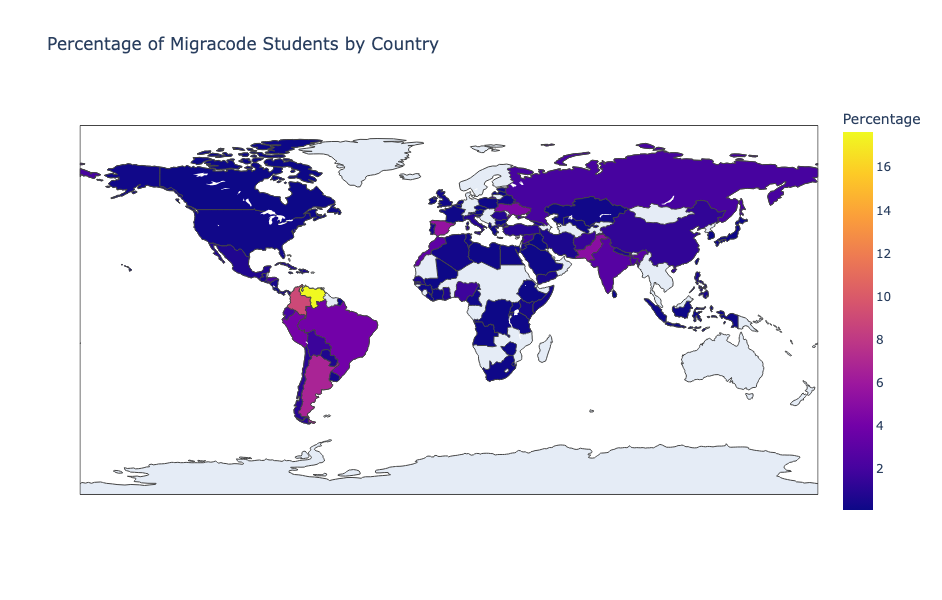

In [15]:
# Create a percentage from each country 
country_counts = migra['Country of Birth'].value_counts(normalize=True) * 100
country_counts = country_counts.reset_index()
country_counts.columns = ['Country', 'Percentage']

# Create the interactive map
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Percentage",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Percentage of Migracode Students by Country"
)

fig.update_layout(
    width=900,  #ratio should be 3:2
    height=600 
)
# Show the map
fig.show()


## Analysis
This interactive graph is a heatmap illustrating the percentage of Migracode students from each origin country. It's interesting to note that despite the requirement to be from an origin country outside the EU, a decent amount of Migracode applicants come from within the EU. This could indicate need for these services from this demographic as well. 

Note the hottest colors from South American countries, particularly Venezuela, Colombia and Argentina. This may be attributed in part to the aforementioned expedited citizenship process. According to the expedited process, if a person has citizenship in a Latin American country, they only have to reside in Spain for two years before they're eligible to apply to be a Spanish national. 

This is also illuminating as the [United Nations Refugee Agency (UNHCR) cites Venezuela and Latin America among situations displacing people globally (through its Operations Data Portal](https://data.unhcr.org/en/situations). Among other situations listed are the Afghanistan situation, which includes Pakistan, another high-proportion origin country, and the Ukraine situation, which displaces Ukrainian and Russian nationals. 

The UNHCR does not provide data on Morocco, but during my time in Spain, Moroccan immigration was a frequent topic of discussion at work, and it does show up on our heatmap. With some further exploration, I find that there is [historical tension at the Spanish-Moroccan border](https://www.washingtoninstitute.org/policy-analysis/reasons-behind-spanish-moroccan-crisis). Ceuta and Melilla, the two Spanish cities that border Northern Africa, engage in a contraband economy which results in large tax revenue loss for Morocco. The Spanish border has been closed to Morocco since 2020, but illegal immigration continues and often sparks media interest and xenophobia throughout Spain. While this issue is broad and too complex to fully describe here (or for me to fully understand without more research), it nonetheless accounts for a large portion of non-EU immigrants in Spain, and, as seen here, Migracode Students. 


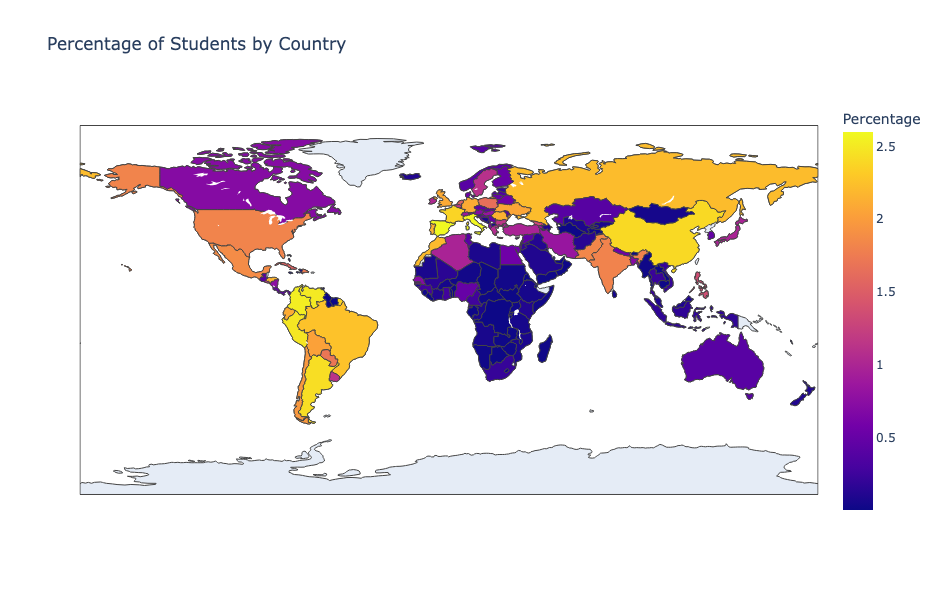

In [17]:
import pandas as pd
import plotly.express as px

# Load your datasets
pop_codes = pd.read_csv('./data/Barcelona_Population_City_Hall_2023.csv')  # Contains country codes
country_encodings = pd.read_csv('./data/Country_Encodings.csv')          # Contains code-to-name mapping

dataset_with_codes.head(10)
codes_to_names.head(10)

#Merge datasets to get country names
merged_data = pop_codes.merge(codes_to_names, left_on='NACIONALITAT_PAIS', right_on='Codi_Valor')

# Calculate the percentage of each country
country_counts = merged_data['Desc_Valor_EN'].value_counts(normalize=True) * 100
country_counts = country_counts.reset_index()
country_counts.columns = ['Country', 'Percentage']

# Create the interactive map
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Percentage",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Percentage of Students by Country"
)

# Update layout to make the map larger
fig.update_layout(
    width=900,  # Adjust the width
    height=600   # Adjust the height
)

# Show the map
fig.show()


## Discussion

### Aside
During the internship, while I was often tasked with web development issues, my coworker was instructed to improve many of the data tables, as there are many across OCC's various other projects. He ran into issues when attempting to automate what I have manually done here, as people can misspell their names, use the same email for different people, or use many different formats for phone numbers. OCC doesn't currently use a unique identifier such as a student ID. Because it's such a small organization, we quickly realized that we were the only people trying to improve this (me by looking over his shoulder). This makes it difficult for the people at OCC to draw conclusions about their students, and for me to do the same throughout this project.  

From a web development standpoint, the websites for OCC, Migracode and other projects can be visually confusing, not updated, or, simply put, bad. This can make it more confusing to apply for these classes and properly fill out the forms. 

For these reasons, error can be introduced when I attempt to make each entry correspond to one individual. 